## Sentiment Analysis

Gerçekleştirilecek adımlar sırasıyla şu şekildedir:

<br>
<img src="i1.png" style="width:800px;height:100px"/><br> 

❗Neural network modellerini kullanabilmek için Keras kütüphanesinden faydalanacağız.

❗Duyarlılık analizi (Sentiment Analysis), filmlerin yorumlarının analizine veya bir ürünün yorumlarınının analizine denir. IMDB veri setindeki insanların görüşlerini kullanarak duyarlılık analizi gerçekleştireceğiz. Keras kütüphanesinin sağladığı veriyi kullanarak data'yı import edeceğiz.

❗RNN'nin özelliği, tekrarlanan neural network anlamına gelmektedir. Eğer zamana bağlı bir veri var ise ki text işlemi söz konusu ise zamana bağlı bir veri vardır. Zamana bağlıdan kasıt, kelimelerin ard arda, dizilim şeklinde olmasıdır. Bir kelimenin başka bir kelimeden önce ya da sonra geliyor olması cümlelerin ya da kelimelerin olumlu mu ya da olumsuz olduğunu anlamamızda önemli bir kriter oluşturmaktadır. Bu nedenle RNN kullanılacaktır.

### Kütüphanelerin Yüklenmesi

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from keras.datasets import imdb
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from tensorflow.keras.layers import Embedding
from keras.layers import SimpleRNN, Dense, Activation

import warnings
warnings.filterwarnings("ignore")

Keras kütüphanesi kullanarak neural network eğitebilmek için neural network'ü input olarak giriş sağlayacak verilerin boyutu aynı olmak zorundadır. Yani mesela 3 cümle olsun ve bu kelimeler birer input olsun. 1.cümle 3 kelimeden, 2.cümle 5 kelimeden ve 3.cümle 2 kelimeden oluşsun. Bu durumda input'ların boyutları aynı değildir ve keras böyle bir durumu kabul etmez. Bu nedenle "from keras_preprocessing.sequence import pad_sequences" satırında import ettiğim pad_sequences yöntemini kullanarak her bir input'un boyutları fixlenir yani düzeltilir. Mesela 5'e fixleyecek olursak, 1.cümlenin başına 2 tane boş kelime(0) eklenir, 2.cümlede değişiklik olmaz ve 3.cümlenin başına 3 tane boş kelime(0) eklenir.

"from tensorflow.keras.layers import Embedding" satırında import edilen Embedding metotu ile, integer'ları belirli boyutlarda yoğunluk vektörlerine çevirmemize yardımcı olacak bir tane layer oluşturulacak. Bu işlemi belirli bir kelime sayısına göre gerçekleştireceğiz ve sadece o kadar kelimeyi int'den dense layer'lara çevireceğiz. 

### Veri Seti ve Problem Tanıtımı

Sentiment analysis, bir text üzerindeki görüşü tanımlamak veya kategorize etmektir. Yazıyı yazan kişinin görüşünün anlaşılması amacıyla olumlu, olumsuz veya nötr şeklinde nitelendiriyoruz.

Sentiment analysis işlemi için insanların görüşlerine ihtiyaç vardır. Bu ihtiyacı imdbfilimlerindeki görüşlerden faydalanarak karşılayacağız.

IMDB: Internet Movie Data Base

IMDB, yeryüzündeki tüm ülkelerin ve tüm dönemlerin sinema ve televizyon filmleri, film yıldızları ve dizileri hakkında bilgi barındıran çevrimiçi bir veri tabanıdır.

Bazı yorumları alarak neural network'ü eğiteceğiz ve modele yeni bir yorum verdiğimizde bu yorumun olumlu mu olumsuz mu olduğunu tahmin etmeye çalışacağız.

Bunu yaparken bazı problemler vardır. Polarity diye bir sorun bulunmaktadır. Mesela puanı 6 olan bir yorum olumlu mudur? olumsuz mudur? Birisi bu yorumlu olumlu olarak etiketlerken, bir başkası olumsuz olarak etiketleyebilir. Dolayısıyla burada fikrin polarity'i söz konusudur. Yani öznel fikirler bulunmaktadır. Bu nedenle sentiment analysis konularında bazı verilere çok güvenemiyoruz.

Sentiment analysis ile ilgili bir problem ise ironinin anlaşılamamasıdır.

Bu bahsettiğim problemler ile bu projede ilgilenmeyeceğiz, fakat sentiment analysis hakkında bilgilendirme amacıyla belirtmekte fayda gördüm 🙂

<font color="Chocolate"><br>
Veri seti hakkında bilgilendirme yapalım.

IMDB veri setinde 25.000 tane train setinde, 25.000 tane test setinde veri vardır. Toplamda 50.000 tane veri vardır. Mesela en çok kullanılan kelime int tipine çevrilerek 1 verilmiştir. 2. en çok kullanılan kelimeye 2 verilmiştir. mesela ingilizcede en çok kullanılan kelime "the" olabilir. "the" kelimesi " olarak int tipiyle veri setine yüklenmiştir. Veri seti int tipinde verilerek bizim preprocesisng işleminden kurtulmamız sağlanmıştır. Eğer anlayamadığımız bri kelime veya boş bir kelime var ise 0 (sıfır) olarak adlandırılmıştır. Yani 0 değeri unknown anlamına gelmektedir.
    
Şimdi veri setini yükleyelim.

In [2]:
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(path = "ibdb.npz",
                                                       num_words= None,
                                                       skip_top = 0,
                                                       maxlen = None,
                                                       seed = 113,
                                                       start_char = 1,
                                                       oov_char = 2,
                                                       index_from = 3)

print("Type: ", type(X_train))
print("Type: ", type(Y_train))

print("X train shape: ",X_train.shape)
print("Y train shape: ",Y_train.shape)


Type:  <class 'numpy.ndarray'>
Type:  <class 'numpy.ndarray'>
X train shape:  (25000,)
Y train shape:  (25000,)


ibdb.npz ifadesindeki npz uzantısını numpy'ın zipli hali gibi düşünebiliriz.

### Keşifsel-Açıklayı Veri Analizi (Exploratory Data Science)

Y train values:  [0 1]
Y test values:  [0 1]
Y train distribution:  {0: 12500, 1: 12500}
Y test distribution:  {0: 12500, 1: 12500}


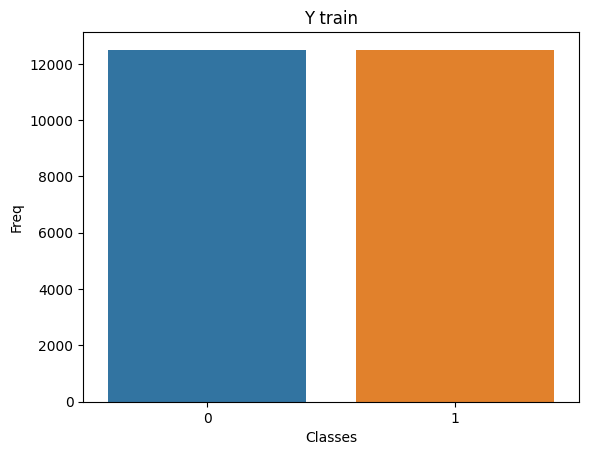

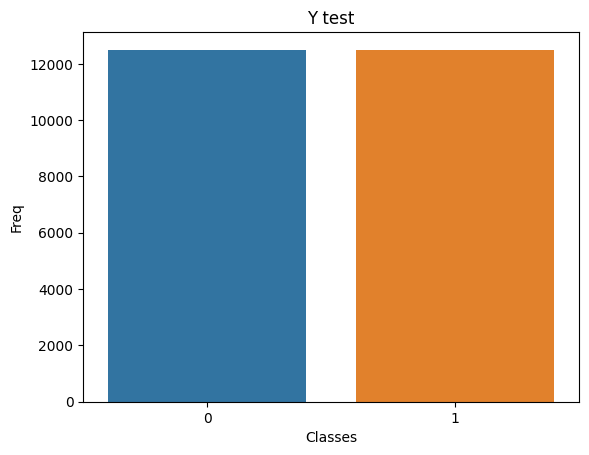

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218
Train mean: 238.71364
Train medi

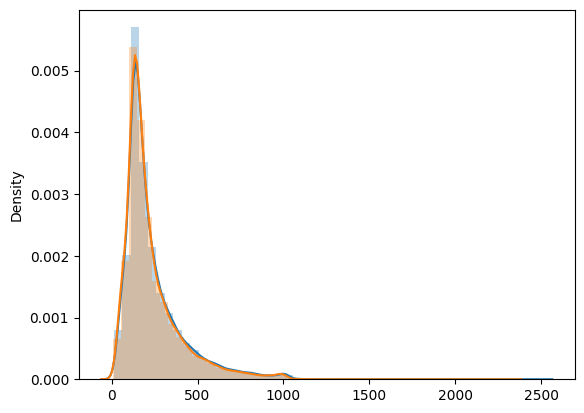

In [3]:
# EDA

print("Y train values: ",np.unique(Y_train))
print("Y test values: ",np.unique(Y_test))

unique, counts = np.unique(Y_train, return_counts = True)
print("Y train distribution: ",dict(zip(unique,counts)))

unique, counts = np.unique(Y_test, return_counts = True)
print("Y test distribution: ",dict(zip(unique,counts)))

plt.figure()
sns.countplot(Y_train)
plt.xlabel("Classes")
plt.ylabel("Freq")
plt.title("Y train")
plt.show()

plt.figure()
sns.countplot(Y_test)
plt.xlabel("Classes")
plt.ylabel("Freq")
plt.title("Y test")
plt.show()

d = X_train[0]
print(d)
print(len(d))

review_len_train = []
review_len_test = []
for i, ii in zip(X_train, X_test):
    review_len_train.append(len(i))
    review_len_test.append(len(ii))

sns.distplot(review_len_train, hist_kws = {"alpha":0.3})
sns.distplot(review_len_test, hist_kws = {"alpha":0.3})

print("Train mean:", np.mean(review_len_train))
print("Train median:", np.median(review_len_train))
print("Train mode:", stats.mode(review_len_train))

print("Y train values: ",np.unique(Y_train))

print("Y test values: ",np.unique(Y_test))

Bu satırlarda y_train ve y_test setleri içerisinde kaç tane label olduğuna yani kaç tane class olduğuna bakılmıştır. Çıktıda görüldüğü üzere olumlu ve olumsuz değerlerini ifade edecek şekilde 0 ve 1 olmak üzere 2 tane class vardır.

unique, counts = np.unique(Y_train, return_counts = True)

print("Y train distribution: ",dict(zip(unique,counts)))

unique, counts = np.unique(Y_test, return_counts = True)

print("Y test distribution: ",dict(zip(unique,counts)))

satırlarında class'ların dağılımlarına bakılmıştır. Bu satırların çıktısı

Y train distribution:  {0: 12500, 1: 12500}

Y test distribution:  {0: 12500, 1: 12500}
 
şeklindedir. Y train'in dağılımı, 12500 tane 0 ve 12500 tane 1 şeklindedir. Y test'in dağılımı da aynı şekildedir.

Sonrasında count plot ile bu dağılımın görselleştirilmesi sağlanmıştır.

d = X_train[0]

print(d)

print(len(d))

satırlarında X_train setinin 0.indeksi yazdırılmıştır. Elde edilen sonuç:

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]

şeklindedir. 218 tane int tipinde sayılar olduğu görülmektedir. Birde uzunluğu yazdırılmıştır ve 218 olduğu görülmektedir.

review_len_train = []

review_len_test = []

for i, ii in zip(X_train, X_test):

    review_len_train.append(len(i))
    
    review_len_test.append(len(ii))

sns.distplot(review_len_train, hist_kws = {"alpha":0.3})

sns.distplot(review_len_test, hist_kws = {"alpha":0.3})

satırlarında kelimelerin adet dağılımları görselleştirilmiştir. Çıktıda görüldüğü üzere kuyruk sağa doğru uzamaktadır ve bunun anlamı positive skewness'tir. Normal dağılıma sahip değildir, biraz sola yatmış bir dağılımdır.

print("Train mean:", np.mean(review_len_train))

print("Train median:", np.median(review_len_train))

print("Train mode:", stats.mode(review_len_train))

satırlarında mean, median ve mode değerlerine bakılmıştır. Mode, en tepe noktasıdır. Çıktıda görüldüğü üzere 132 değeri plot'taki en tepedeki sivri uçtur.

❗Keras kütüphanesinde kullanılan neural network'ğn input parametreleri fix olmalıdır. Ama plot'ta görüldüğü üzere bir dağılım söz konusudur, fixlik söz konusu değildir. Belirli bir sayı belirleyerek tüm review'leri belirlediğimiz size'a taşımalıyız. Mode değeri olan 132 değerini size olarak belirlemek mantıklı görünmektedir. Fix bir size için aşağı yukarı 130-150 değerlerini kullanmak mantıklıdır. Bu işlem için kelime sayısı belirlediğimiz size'dan çok olanları kırpacağız, kelime sayısı az olanları boş kelime anlamına gelen 0 ile dolduracağız.

Bu işlemi gerçekleştirelim.

In [4]:
# number of words
word_index = imdb.get_word_index()
print(type(word_index))
print(len(word_index))

for keys, values in word_index.items():
    if values == 22:
        print(keys)

def whatItSay(index = 24):
    
    reverse_index = dict([(value, key) for (key, value) in word_index.items()])
    decode_review = " ".join([reverse_index.get(i - 3, "!") for i in X_train[index]])
    print(decode_review)
    print(Y_train[index])
    return decode_review

decoded_review = whatItSay(36)

<class 'dict'>
88584
you
! sorry i just didn't find the subject matter as compelling as the filmmaker did the robot guy and the mole rat guy were pretty interesting although morris didn't really tell us much about them the other two subjects were a bore and the supposed connections between them didn't hold up
0


### Preprocess: Padding ve Eğitim/Test Verisinin Ayrılması

Veriyi train edilebilir hale getirmek için yapılması gereken 2 tane işlem vardır.

Veri setinde 88584 tane unique kelime vardır. Bu çok fazla olduğu için 15.000 'e düşereceğiz.

In [5]:
# Preprocess

num_words = 15000
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=num_words)

maxlen = 130
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

print(X_train[5])

for i in X_train[0:10]:
    print(len(i))

decoded_review = whatItSay(5)

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1  778  128   74   12  630  163   15    4 1766 7982
 1051    2   32   85  156   45   40  148  139  121  664  665   10   10
 1361  173    4  749    2   16 3804    8    4  226   65   12   43  127
   24    2   10   10]
130
130
130
130
130
130
130
130
130
130
! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! begins better than it ends funny that the russian submarine crew ! all other actors it's like those scenes where documentar

num_words = 15000
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=num_words) 

satırları ile num_words'ü 15.000 ile sınırladık. Yani artık 15.000 tane kelime vardır.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 130, 32)           480000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                784       
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 480,801
Trainable params: 480,801
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
196/196 [==============================] - 32s 150ms/step - loss: 0.5933 - accuracy: 0.7000 - val_loss: 0.5000 - val_accuracy: 0.8095
Epoch 2/5
196/196 [==============

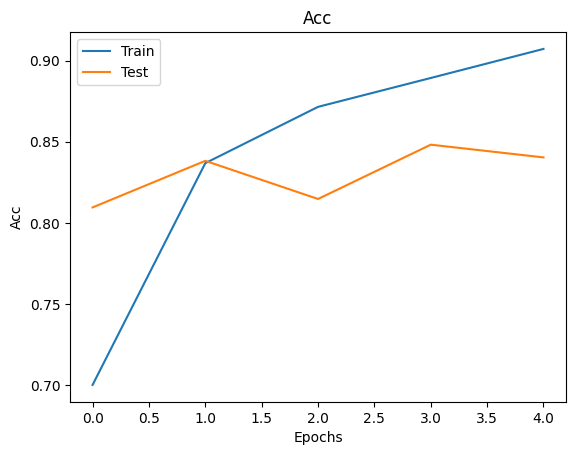

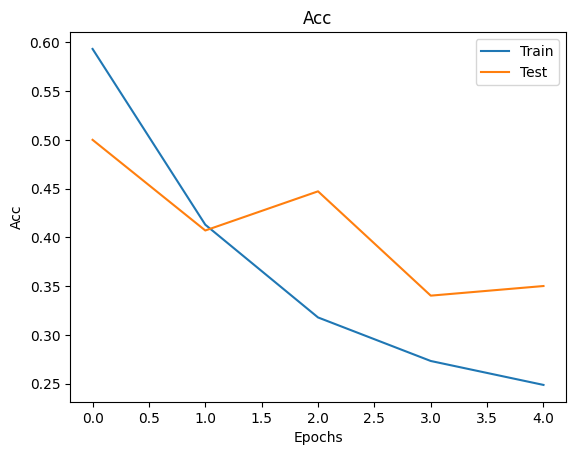

In [6]:
# RNN

rnn = Sequential()
rnn.add(Embedding(num_words, 32, input_length = len(X_train[0])))
rnn.add(SimpleRNN(16, input_shape = (num_words,maxlen), return_sequences= False, activation= "relu"))
rnn.add(Dense(1))
rnn.add(Activation("sigmoid"))

print(rnn.summary())
rnn.compile(loss = "binary_crossentropy", optimizer="rmsprop",metrics= ["accuracy"])

history = rnn.fit(X_train, Y_train, validation_data= (X_test, Y_test), epochs=5, batch_size= 128, verbose=1)

score = rnn.evaluate(X_test, Y_test)
print("Accuracy: %",score[1]*100)

plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Acc")
plt.ylabel("Acc")
plt.xlabel("Epochs")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Acc")
plt.ylabel("Acc")
plt.xlabel("Epochs")
plt.legend()
plt.show()
